# Install Libraries

In [1]:
# ! pip install pandas==2.2.2
# ! pip install matplotlib==3.9.2
# ! pip install seaborn==0.13.2
# ! pip install scikit-learn==1.5.1
# ! pip install joblib=1.4.2

# Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# data discovery

In [3]:
df = pd.read_csv('heart_disease_uci.csv')
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [5]:
df.describe(include= 'all')

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
count,920.000000,920.000000,920,920,920,861.000000,890.000000,830,918,865.000000,865,858.000000,611,309.000000,434,920.000000
unique,NaN,NaN,2,4,4,NaN,NaN,2,3,NaN,2,NaN,3,NaN,3,NaN
top,NaN,NaN,Male,Cleveland,asymptomatic,NaN,NaN,False,normal,NaN,False,NaN,flat,NaN,normal,NaN
freq,NaN,NaN,726,304,496,NaN,NaN,692,551,NaN,528,NaN,345,NaN,196,NaN
mean,460.500000,53.510870,NaN,NaN,NaN,132.132404,199.130337,NaN,NaN,137.545665,NaN,0.878788,NaN,0.676375,NaN,0.995652
std,265.725422,9.424685,NaN,NaN,NaN,19.066070,110.780810,NaN,NaN,25.926276,NaN,1.091226,NaN,0.935653,NaN,1.142693
min,1.000000,28.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,60.000000,NaN,-2.600000,NaN,0.000000,NaN,0.000000
25%,230.750000,47.000000,NaN,NaN,NaN,120.000000,175.000000,NaN,NaN,120.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000
50%,460.500000,54.000000,NaN,NaN,NaN,130.000000,223.000000,NaN,NaN,140.000000,NaN,0.500000,NaN,0.000000,NaN,1.000000
75%,690.250000,60.000000,NaN,NaN,NaN,140.000000,268.000000,NaN,NaN,157.000000,NaN,1.500000,NaN,1.000000,NaN,2.000000


In [6]:
missing_sum = df.isnull().sum()
missing_persentage = (missing_sum / len(df)) * 100
missing_data_df = pd.DataFrame({'missing_sum': missing_sum, 'missing_persentage':missing_persentage})
missing_data_df

,missing_sum,missing_persentage
id,0,0.000000
age,0,0.000000
sex,0,0.000000
dataset,0,0.000000
cp,0,0.000000
trestbps,59,6.413043
chol,30,3.260870
fbs,90,9.782609
restecg,2,0.217391
thalch,55,5.978261


# data cleaning

In [7]:
# rename the columns with meaningful name

df.rename(columns={
    'cp': 'chest_pain_type',
    'trestbps': 'resting_blood_pressure',
    'chol': 'cholesterol',
    'fbs': 'fasting_blood_sugar',
    'restecg': 'heart_ecg',
    'thalch': 'maximum_heart_rate',
    'exang': 'exercise_induced_angina',
    'ca': 'num_major_vessels',
    'thal': 'thallium_stress_test',
    'num':'target'
}, inplace= True)

In [8]:
# fill the missing value
df = df.fillna({
    'resting_blood_pressure': df['resting_blood_pressure'].mean(),
    'cholesterol': df['cholesterol'].mean(),
    'fasting_blood_sugar': df['fasting_blood_sugar'].mode()[0],
    'heart_ecg': df['heart_ecg'].mode()[0],
    'maximum_heart_rate': df['maximum_heart_rate'].mean(),
    'exercise_induced_angina': df['exercise_induced_angina'].mode()[0],
    'oldpeak': df['oldpeak'].mean()
})

C:\Users\User\AppData\Local\Temp\ipykernel_268\3548135105.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna({


In [9]:
dataset = df.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,15]].copy()
dataset.drop('dataset', axis=1, inplace=True)

In [10]:
dataset.nunique()

age                         50
sex                          2
chest_pain_type              4
resting_blood_pressure      62
cholesterol                218
fasting_blood_sugar          2
heart_ecg                    3
maximum_heart_rate         120
exercise_induced_angina      2
oldpeak                     54
target                       5
dtype: int64

In [11]:
for col in dataset.columns:
    col_unique = dataset[col].unique()
    print(f'{col} : {col_unique}')

age : [63 67 37 41 56 62 57 53 44 52 48 54 49 64 58 60 50 66 43 40 69 59 42 55
 61 65 71 51 46 45 39 68 47 34 35 29 70 77 38 74 76 28 30 31 32 33 36 72
 73 75]
sex : ['Male' 'Female']
chest_pain_type : ['typical angina' 'asymptomatic' 'non-anginal' 'atypical angina']
resting_blood_pressure : [145.         160.         120.         130.         140.
 172.         150.         110.         132.         117.
 135.         112.         105.         124.         125.
 142.         128.         170.         155.         104.
 180.         138.         108.         134.         122.
 115.         118.         100.         200.          94.
 165.         102.         152.         101.         126.
 174.         148.         178.         158.         192.
 129.         144.         123.         136.         146.
 106.         156.         154.         114.         164.
  98.         190.         132.13240418 113.          92.
  95.          80.         185.         116.           0.
  96.      

In [12]:
counts = dataset['fasting_blood_sugar'].value_counts()
print(counts)

fasting_blood_sugar
False    782
True     138
Name: count, dtype: int64


In [13]:
# repleace non_zero : True
dataset['fasting_blood_sugar'] = dataset['fasting_blood_sugar'].astype(bool)

In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      920 non-null    int64  
 1   sex                      920 non-null    object 
 2   chest_pain_type          920 non-null    object 
 3   resting_blood_pressure   920 non-null    float64
 4   cholesterol              920 non-null    float64
 5   fasting_blood_sugar      920 non-null    bool   
 6   heart_ecg                920 non-null    object 
 7   maximum_heart_rate       920 non-null    float64
 8   exercise_induced_angina  920 non-null    bool   
 9   oldpeak                  920 non-null    float64
 10  target                   920 non-null    int64  
dtypes: bool(2), float64(4), int64(2), object(3)
memory usage: 66.6+ KB


# data visualization

In [15]:
num_col = ['age', 'resting_blood_pressure', 'cholesterol', 'maximum_heart_rate', 'oldpeak']
cat_col = ['sex', 'chest_pain_type', 'fasting_blood_sugar', 'heart_ecg', 'exercise_induced_angina']

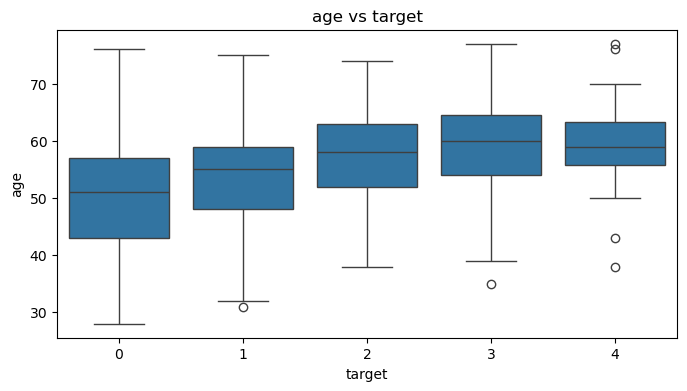

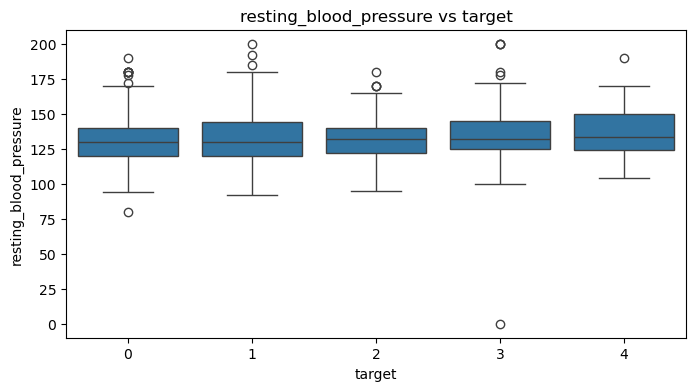

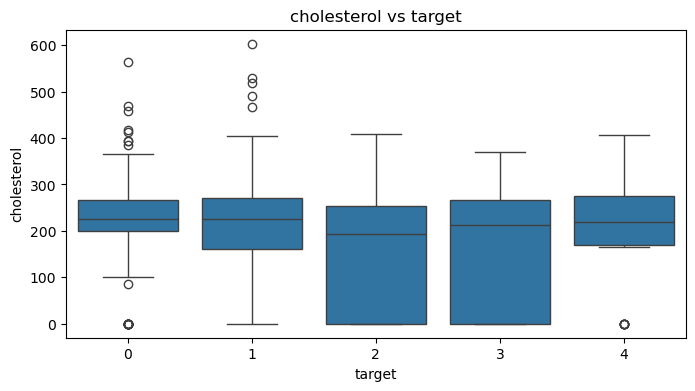

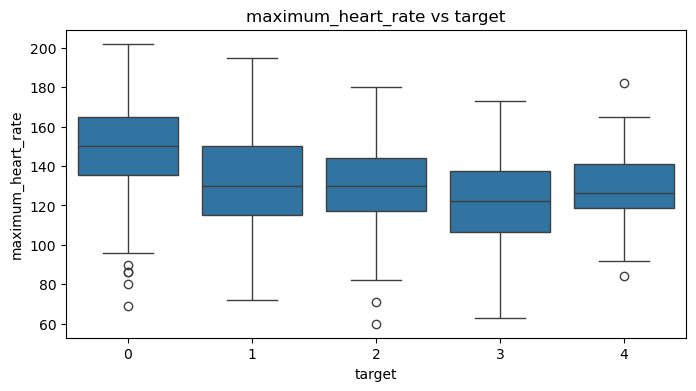

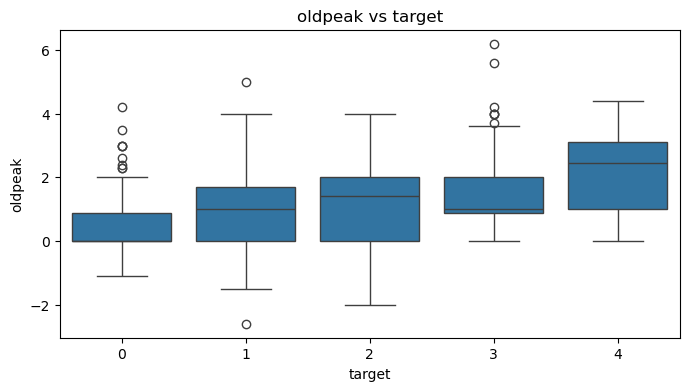

In [16]:
for col in num_col:
    if pd.api.types.is_numeric_dtype(dataset[col]):
        plt.figure(figsize= (8,4))
        sns.boxplot(x = 'target', y= col , data= dataset)
        plt.title(f'{col} vs target')
        plt.show()

In [17]:
chol_zero = dataset.query('cholesterol == 0')
chol = chol_zero.value_counts().sum()
print(f'number zero recoreds of cholesterol = {chol}')

resting_blood_pressure = dataset.query('resting_blood_pressure == 0')
resting_blood_pressure = resting_blood_pressure.value_counts().sum()
print(f'number zero recoreds of resting_blood_pressure = {resting_blood_pressure}')

number zero recoreds of cholesterol = 172
number zero recoreds of resting_blood_pressure = 1


In [18]:
# keep values where cholesterol != 0, otherwise substitute the mean
dataset['cholesterol'] = dataset['cholesterol'].where(
    dataset['cholesterol'] != 0,
    other= dataset['cholesterol'].mean()
)

# keep values where resting_blood_pressure != 0, otherwise substitute the mean
dataset['resting_blood_pressure'] = dataset['resting_blood_pressure'].where(
    dataset['resting_blood_pressure'] != 0,
    other= dataset['resting_blood_pressure'].mean()
)

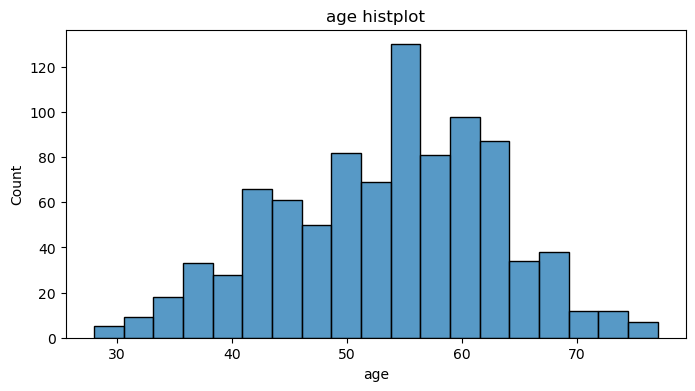

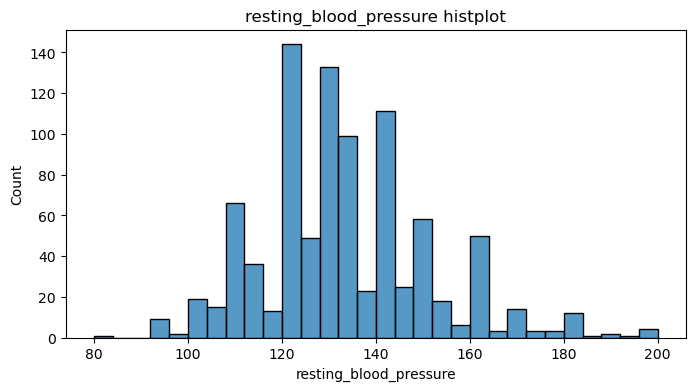

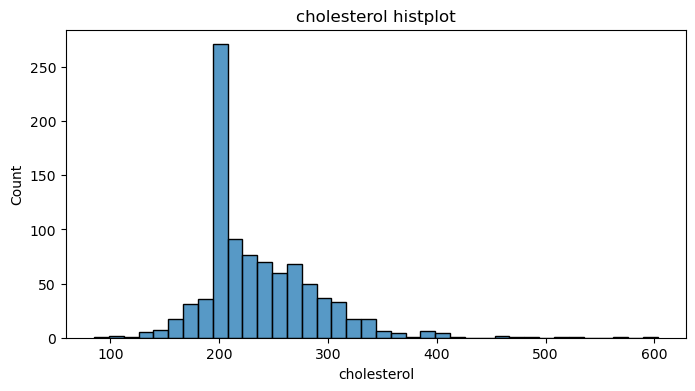

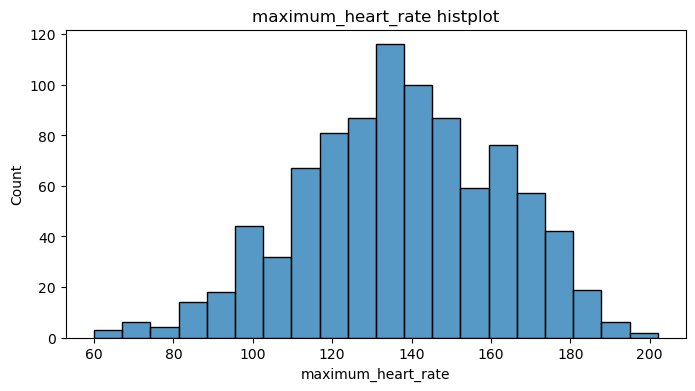

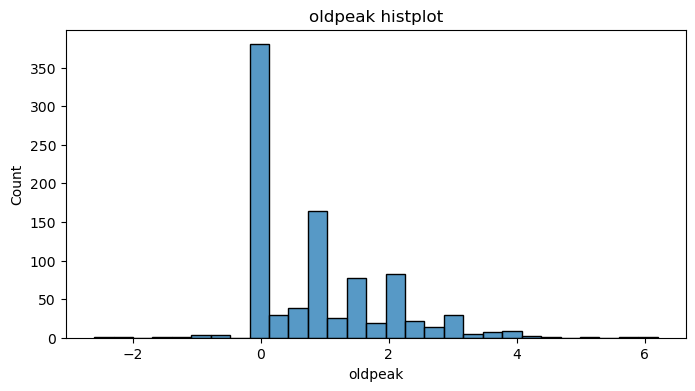

In [19]:
for col in num_col:
    if pd.api.types.is_numeric_dtype(dataset[col]):
        plt.figure(figsize= (8,4))
        sns.histplot( x= col , data= dataset)
        plt.title(f'{col} histplot')
        plt.show()

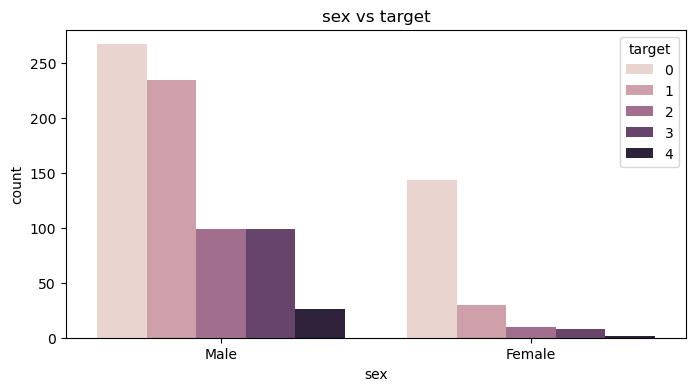

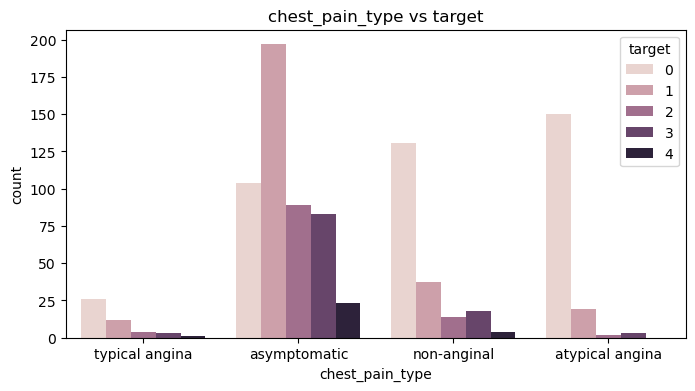

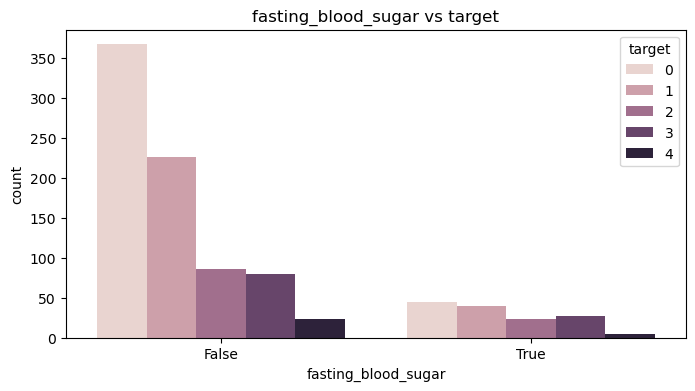

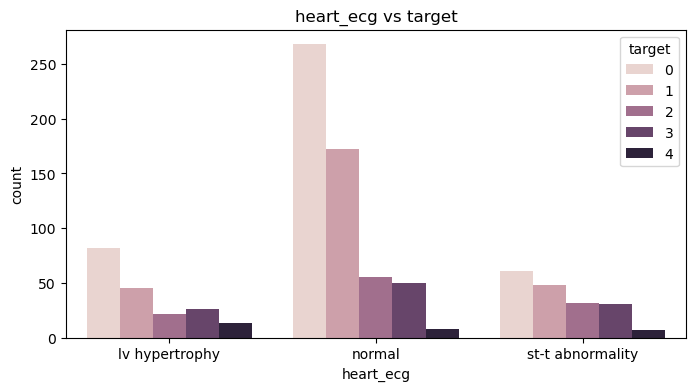

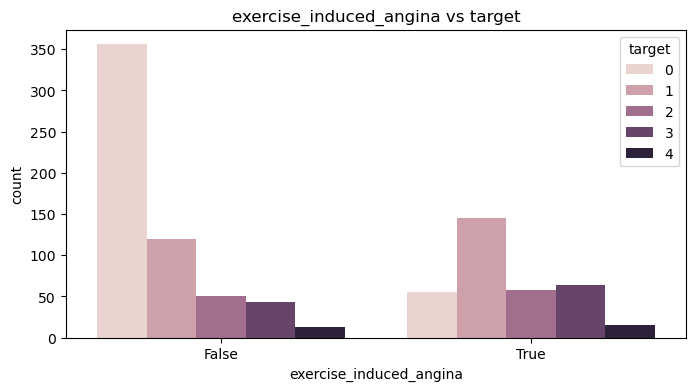

In [20]:
for col in cat_col:
    plt.figure(figsize= (8,4))
    sns.countplot(x= col, hue= 'target' , data= dataset)
    plt.title(f'{col} vs target')
    plt.show()

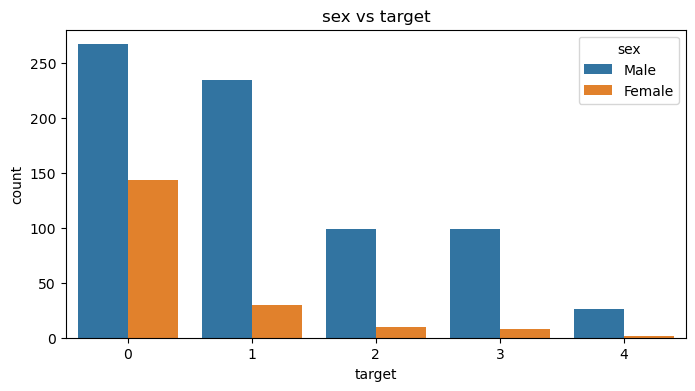

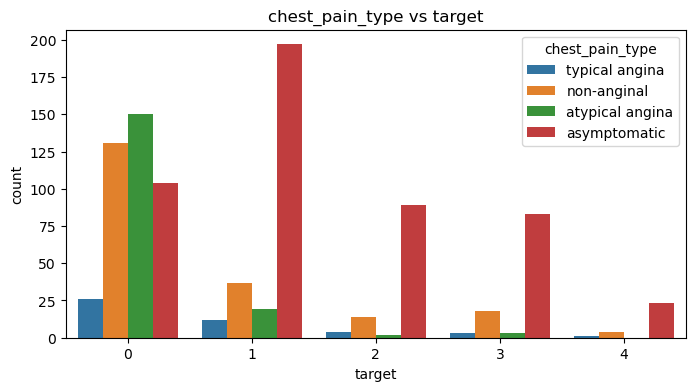

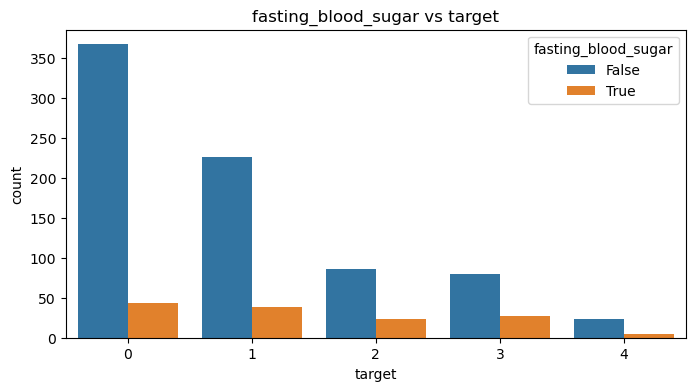

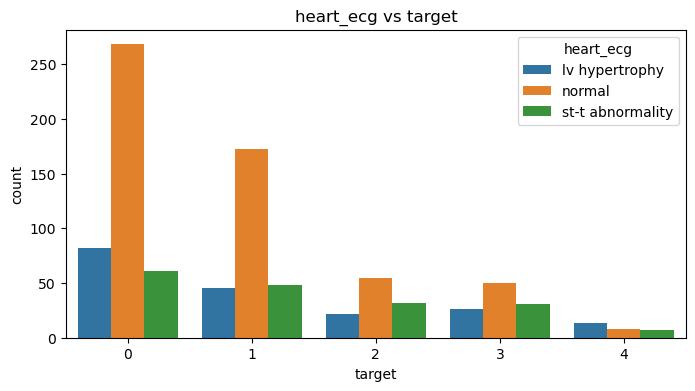

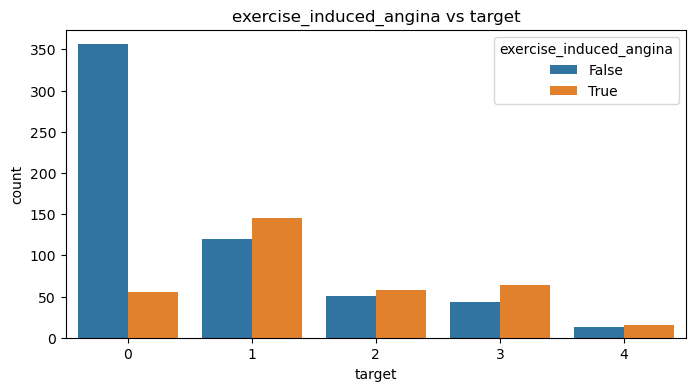

In [21]:
for col in cat_col:
    plt.figure(figsize= (8,4))
    sns.countplot(x= 'target', hue= col  , data= dataset)
    plt.title(f'{col} vs target')
    plt.show()

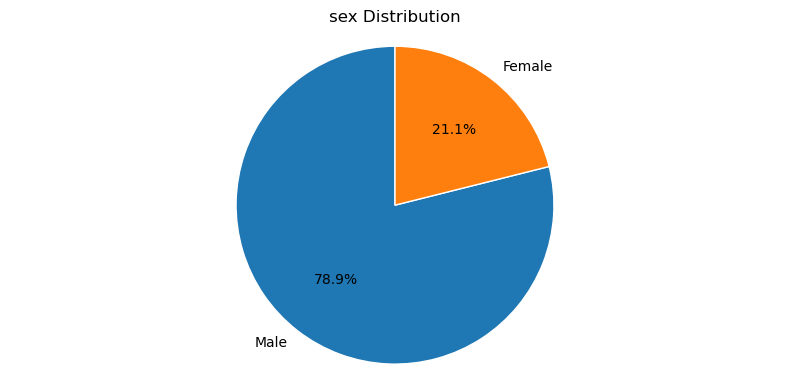

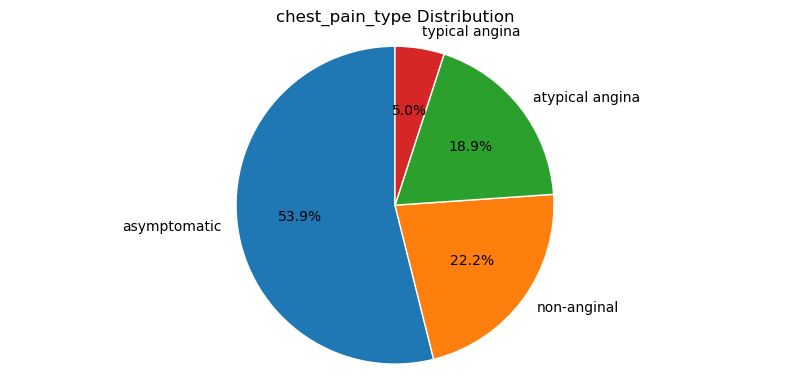

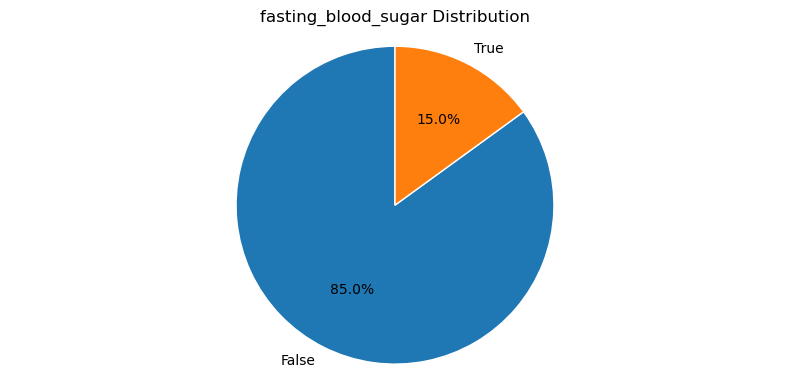

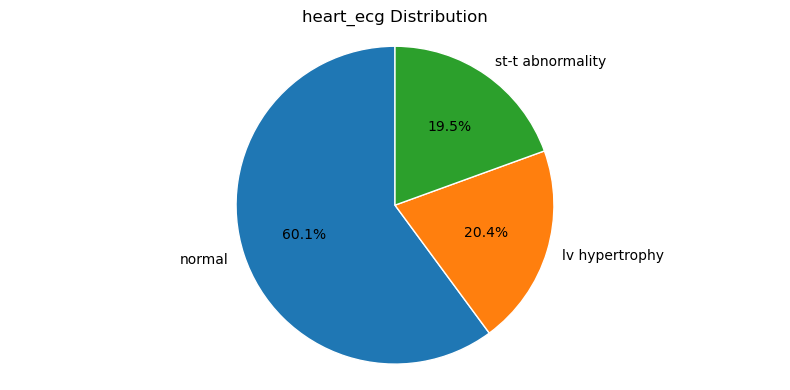

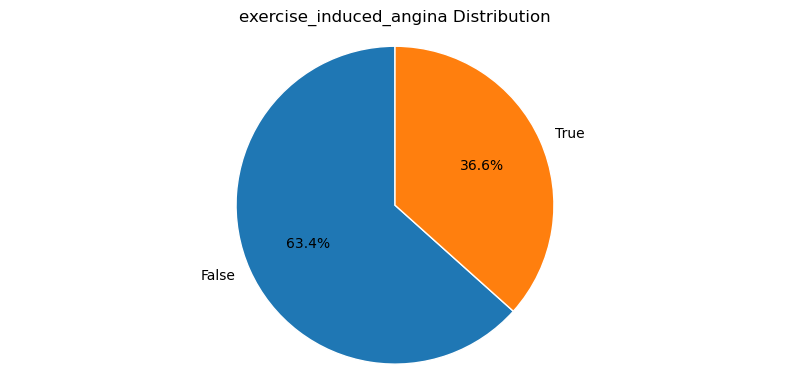

In [22]:
for col in cat_col:
    # 1. Get counts for each category
    counts = dataset[col].value_counts()
    labels = counts.index.tolist()
    sizes  = counts.values

    # 2. Plot
    plt.figure(figsize=(8, 4))
    plt.pie(
        sizes,
        labels=labels,
        autopct='%1.1f%%',    # show percentages
        startangle=90,        # rotate start
        wedgeprops={'edgecolor': 'w'}  # white lines between slices
    )
    plt.title(f'{col} Distribution')
    plt.axis('equal')  # equal aspect ratio ensures the pie is circular
    plt.tight_layout()
    plt.show()


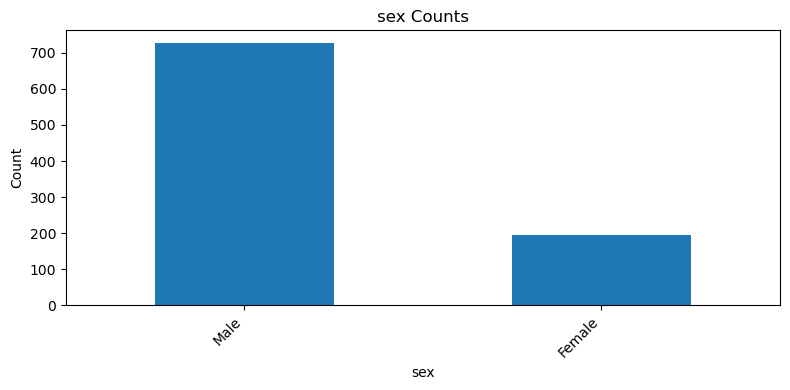

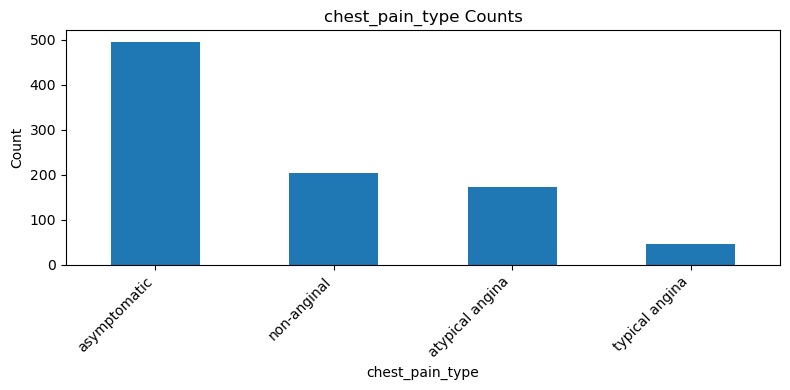

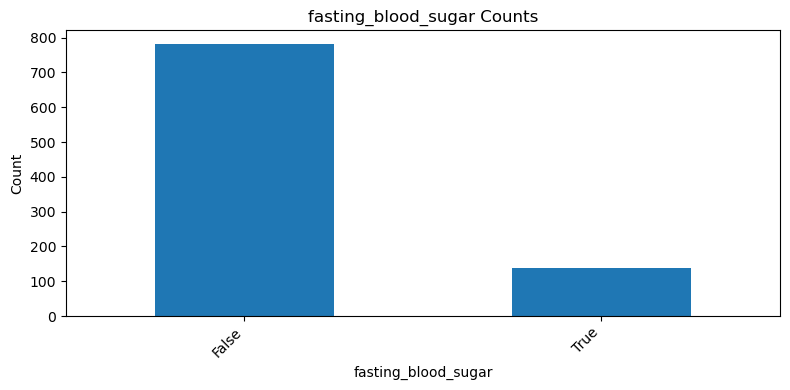

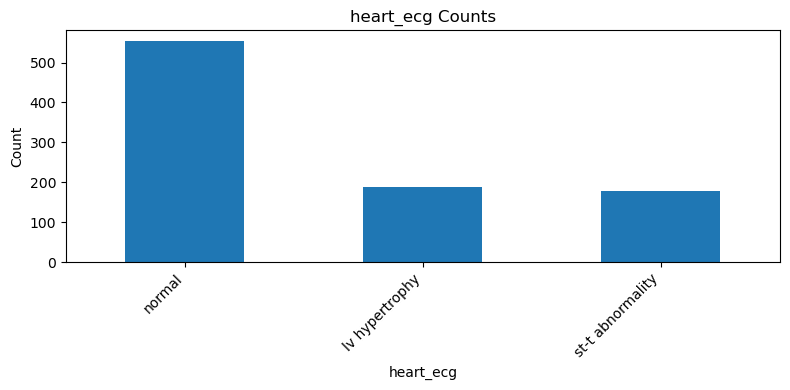

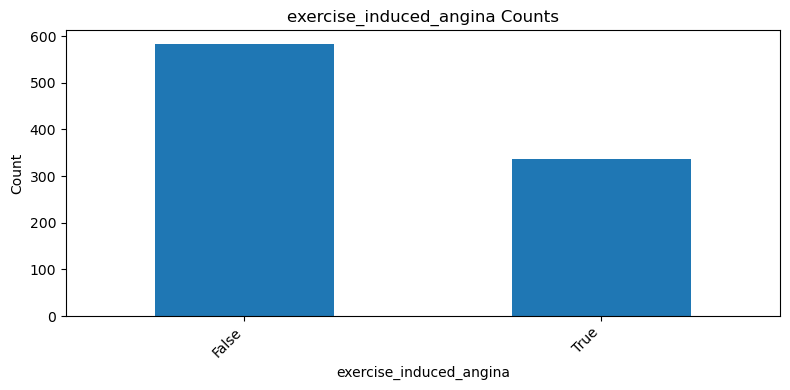

In [23]:
for col in cat_col:
    counts = dataset[col].value_counts()
    plt.figure(figsize=(8,4))
    counts.plot(kind='bar')
    plt.title(f'{col} Counts')
    plt.ylabel('Count')
    plt.xlabel(col)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

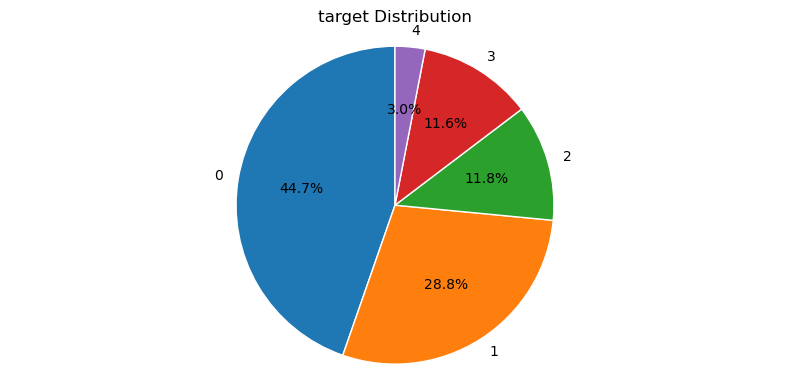

In [24]:
counts = dataset['target'].value_counts()
labels = counts.index.tolist()
sizes  = counts.values

# 2. Plot
plt.figure(figsize=(8, 4))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',    # show percentages
    startangle=90,        # rotate start
    wedgeprops={'edgecolor': 'w'}  # white lines between slices
)
plt.title('target Distribution')
plt.axis('equal')  # equal aspect ratio ensures the pie is circular
plt.tight_layout()
plt.show()

# train the machine learning model

In [25]:
from sklearn.preprocessing import LabelEncoder

le_sex = LabelEncoder()
sex_num = le_sex.fit_transform(df.sex)

le_chest_pain_type = LabelEncoder()
chest_pain_num = le_chest_pain_type.fit_transform(df.chest_pain_type)

le_fasting_blood_sugar = LabelEncoder()
fasting_blood_sugar_num = le_fasting_blood_sugar.fit_transform(df.fasting_blood_sugar)

le_heart_ecg = LabelEncoder()
heart_ecg_num = le_heart_ecg.fit_transform(df.heart_ecg)

le_exercise_induced_angina = LabelEncoder()
exercise_induced_angina_num = le_exercise_induced_angina.fit_transform(df.exercise_induced_angina)

In [26]:
dataset['sex_num'] = sex_num
dataset['chest_pain_num'] = chest_pain_num
dataset['fasting_blood_sugar_num'] = fasting_blood_sugar_num
dataset['heart_ecg_num'] = heart_ecg_num
dataset['exercise_induced_angina_num'] = exercise_induced_angina_num

dataset.drop(['sex', 'chest_pain_type', 'fasting_blood_sugar', 'heart_ecg', 'exercise_induced_angina'], axis=1, inplace=True)

In [27]:
dataset.head()

,age,resting_blood_pressure,cholesterol,maximum_heart_rate,oldpeak,target,sex_num,chest_pain_num,fasting_blood_sugar_num,heart_ecg_num,exercise_induced_angina_num
0,63,145.0,233.0,150.0,2.3,0,1,3,1,0,0
1,67,160.0,286.0,108.0,1.5,2,1,0,0,0,1
2,67,120.0,229.0,129.0,2.6,1,1,0,0,0,1
3,37,130.0,250.0,187.0,3.5,0,1,2,0,1,0
4,41,130.0,204.0,172.0,1.4,0,0,1,0,0,0


In [28]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          920 non-null    int64  
 1   resting_blood_pressure       920 non-null    float64
 2   cholesterol                  920 non-null    float64
 3   maximum_heart_rate           920 non-null    float64
 4   oldpeak                      920 non-null    float64
 5   target                       920 non-null    int64  
 6   sex_num                      920 non-null    int32  
 7   chest_pain_num               920 non-null    int32  
 8   fasting_blood_sugar_num      920 non-null    int64  
 9   heart_ecg_num                920 non-null    int32  
 10  exercise_induced_angina_num  920 non-null    int64  
dtypes: float64(4), int32(3), int64(4)
memory usage: 68.4 KB


<Axes: >

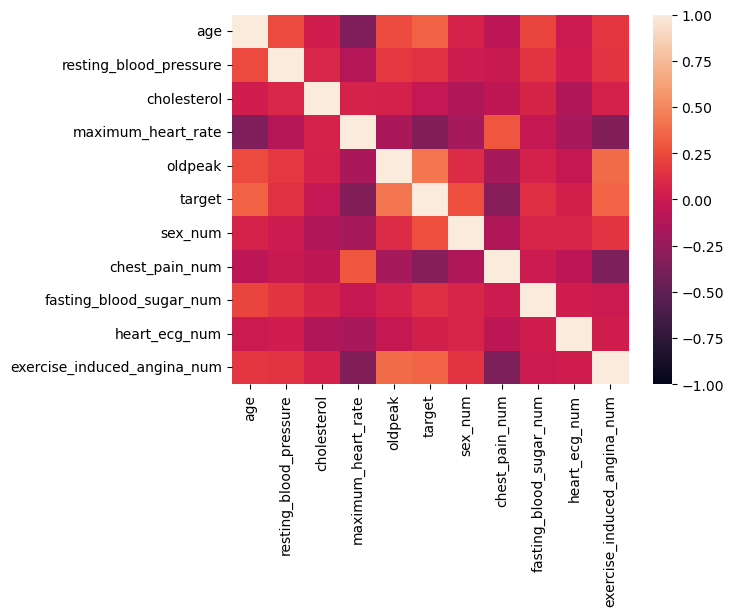

In [29]:
import seaborn as sns

corr = dataset.corr(method='pearson')

sns.heatmap(corr, vmin=-1, vmax=1)

In [30]:
corr

,age,resting_blood_pressure,cholesterol,maximum_heart_rate,oldpeak,target,sex_num,chest_pain_num,fasting_blood_sugar_num,heart_ecg_num,exercise_induced_angina_num
age,1.000000,0.243386,0.028530,-0.353471,0.248082,0.339596,0.056889,-0.076519,0.219915,-0.006652,0.160910
resting_blood_pressure,0.243386,1.000000,0.082821,-0.102099,0.169675,0.133689,0.005249,-0.013011,0.149360,0.015727,0.147293
cholesterol,0.028530,0.082821,1.000000,0.056931,0.054392,-0.035626,-0.139109,-0.055621,0.069236,-0.128993,0.051711
maximum_heart_rate,-0.353471,-0.102099,0.056931,1.000000,-0.149630,-0.351055,-0.177135,0.289362,-0.030271,-0.165651,-0.349828
oldpeak,0.248082,0.169675,0.054392,-0.149630,1.000000,0.421907,0.102733,-0.173515,0.050344,-0.030956,0.382073
target,0.339596,0.133689,-0.035626,-0.351055,0.421907,1.000000,0.259342,-0.314518,0.129539,0.034603,0.350567
sex_num,0.056889,0.005249,-0.139109,-0.177135,0.102733,0.259342,1.000000,-0.125933,0.075370,0.072160,0.155204
chest_pain_num,-0.076519,-0.013011,-0.055621,0.289362,-0.173515,-0.314518,-0.125933,1.000000,0.006370,-0.070150,-0.360513
fasting_blood_sugar_num,0.219915,0.149360,0.069236,-0.030271,0.050344,0.129539,0.075370,0.006370,1.000000,0.025788,-0.003475
heart_ecg_num,-0.006652,0.015727,-0.128993,-0.165651,-0.030956,0.034603,0.072160,-0.070150,0.025788,1.000000,0.026067


In [31]:
dataset.describe()

,age,resting_blood_pressure,cholesterol,maximum_heart_rate,oldpeak,target,sex_num,chest_pain_num,fasting_blood_sugar_num,heart_ecg_num,exercise_induced_angina_num
count,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000
mean,53.510870,132.276026,236.359052,137.545665,0.878788,0.995652,0.789130,0.782609,0.150000,0.990217,0.366304
std,9.424685,17.920905,55.342996,25.138494,1.053774,1.142693,0.408148,0.956350,0.357266,0.631863,0.482056
min,28.000000,80.000000,85.000000,60.000000,-2.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,120.000000,199.130337,120.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,130.000000,221.000000,138.000000,0.800000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,60.000000,140.000000,267.000000,156.000000,1.500000,2.000000,1.000000,2.000000,0.000000,1.000000,1.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000,1.000000,3.000000,1.000000,2.000000,1.000000


In [32]:
X = dataset.drop('target', axis=1)
y = dataset['target']

Before resampling:  920
After resampling:  2055


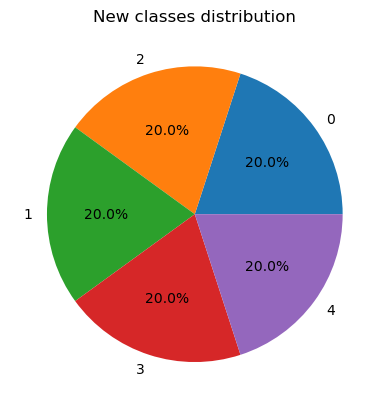

In [33]:
from imblearn.over_sampling import SMOTE
#from sklearn.utils import utils
oversample = SMOTE ()

print("Before resampling: ",len(X))

X, y = oversample.fit_resample(X, y)
print("After resampling: ",len(X))

count_values=y.value_counts()

labels = count_values.index.to_list()

plt.title('New classes distribution')

plt.pie(x = count_values, labels = labels, autopct = '%1.1f%%' )

plt.show()

In [34]:
from sklearn.model_selection import cross_val_score

def cv_comparison_classification(models, X, y, cv):
    
    cv_df = pd.DataFrame()
    
    for model in models:
        
        acc = cross_val_score(model, X, y, scoring='accuracy', cv=cv)
        
        acc_avg = round(acc.mean(), 3)
        
        cv_df[str(model)] = [ acc_avg]
        cv_df.index = ['Accuracy']
        
    return cv_df

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

mlr_d = DecisionTreeClassifier(criterion = "entropy", random_state=0)

mlr_g = GaussianNB()

mlr_reg= LogisticRegression(max_iter=1000, random_state=0)

mlr_k = KNeighborsClassifier()

mlr_svc = svm.SVC(kernel='rbf', random_state=0)

models = [mlr_d, mlr_g, mlr_reg, mlr_k, mlr_svc]

comp_df = cv_comparison_classification(models, X, y, 5)

comp_df

C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

,"DecisionTreeClassifier(criterion='entropy', random_state=0)",GaussianNB(),"LogisticRegression(max_iter=1000, random_state=0)",KNeighborsClassifier(),SVC(random_state=0)
Accuracy,0.622,0.427,0.434,0.609,0.329


In [36]:
from sklearn.model_selection import train_test_split

Xtrain , Xtest, ytrain , ytest = train_test_split(X, y, train_size= 0.8, random_state=0)

In [37]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()

model.fit(Xtrain, ytrain)

KNeighborsClassifier()

In [38]:
ypred = model.predict(Xtest)

In [39]:
from sklearn.metrics import classification_report

print('\nClassification Report\n')
print(classification_report(ytest, ypred, target_names=['No heart disease', 'heart disease stage 1', 'heart disease stage 2', 'heart disease stage 3', 'heart disease stage 4']))


Classification Report

                       precision    recall  f1-score   support

     No heart disease       0.59      0.42      0.49        85
heart disease stage 1       0.61      0.44      0.51        97
heart disease stage 2       0.52      0.67      0.59        72
heart disease stage 3       0.58      0.73      0.64        78
heart disease stage 4       0.73      0.81      0.77        79

             accuracy                           0.60       411
            macro avg       0.60      0.61      0.60       411
         weighted avg       0.61      0.60      0.59       411



In [40]:
import os
import joblib

# 1. Make sure the output folder exists
os.makedirs('model_le', exist_ok=True)
# Suppose clf is your trained classifier
joblib.dump(model, 'model_le/model.pkl')

# Dump each encoder
joblib.dump(le_sex,                   'model_le/le_sex.pkl')
joblib.dump(le_chest_pain_type,       'model_le/le_chest_pain_type.pkl')
joblib.dump(le_fasting_blood_sugar,   'model_le/le_fasting_blood_sugar.pkl')
joblib.dump(le_heart_ecg,             'model_le/le_heart_ecg.pkl')
joblib.dump(le_exercise_induced_angina,'model_le/le_exercise_induced_angina.pkl')

['model_le/le_exercise_induced_angina.pkl']

In [41]:
ex = [[70, 50, 700, 90, 20, 1, 1, 1, 1,1]]

pred = model.predict(ex)
print(f'Prediction = {pred}')
pred_proba = model.predict_proba(ex)
print(f'Prediction Probability = {pred_proba}')

Prediction = [1]
Prediction Probability = [[0.2 0.8 0.  0.  0. ]]


C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [42]:
ex = [[80, 50, 50, 50, 50, 1, 1, 1, 1,1]]

pred = model.predict(ex)
print(f'Prediction = {pred}')
pred_proba = model.predict_proba(ex)
print(f'Prediction Probability = {pred_proba}')

Prediction = [1]
Prediction Probability = [[0.2 0.6 0.  0.2 0. ]]


C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
